- Train a DecisionTreeClassifier on the Wine dataset (load_wine) and visualize the tree using plot_tree().
- Train a RandomForestClassifier on the same dataset and compare accuracies of both models.

Instructions:
* Split data into training and testing sets (80–20).
* Train a DecisionTreeClassifier and a RandomForestClassifier (with 100 estimators).
* Print the accuracy, confusion matrix, and feature importances for both models.
* Compare and discuss which model performs better and why.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = load_wine()
X, y = wine.data, wine.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [7]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [9]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Decision Tree Accuracy: 0.9444444444444444
Random Forest Accuracy: 1.0

Decision Tree Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]

Random Forest Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


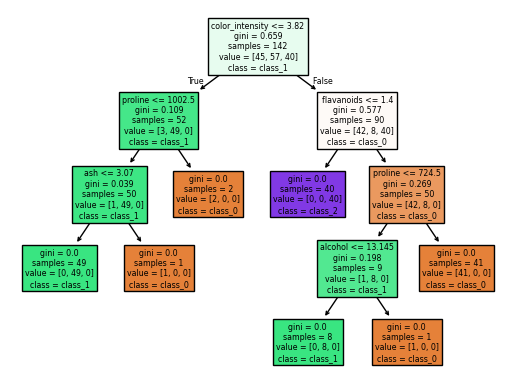

In [27]:
plot_tree(dt, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()

In [11]:
dt_imp = pd.Series(dt.feature_importances_, index=wine.feature_names).sort_values(ascending=False)
rf_imp = pd.Series(rf.feature_importances_, index=wine.feature_names).sort_values(ascending=False)

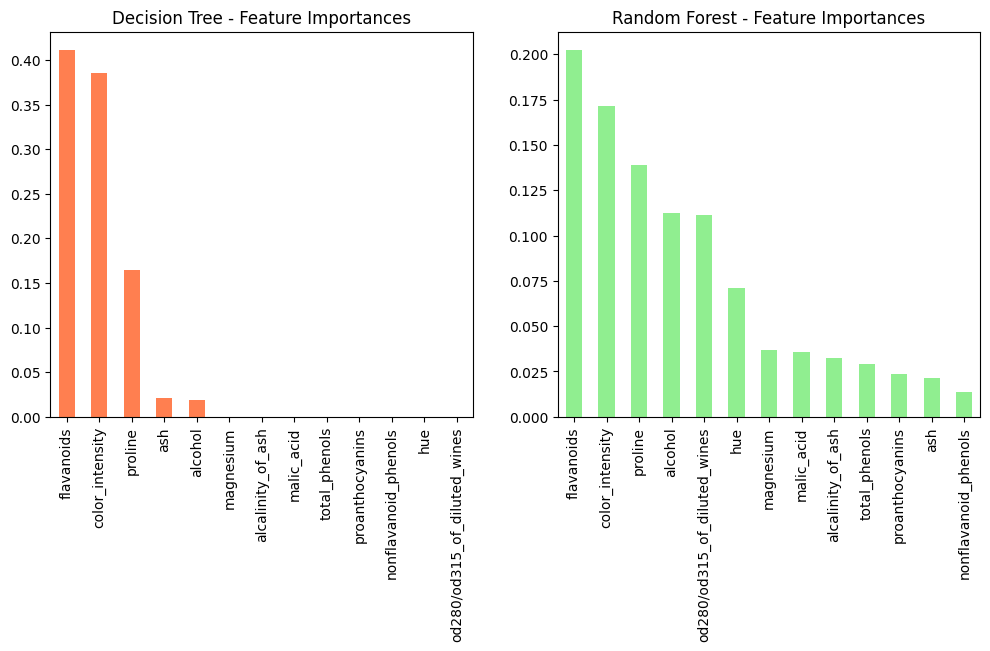

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
dt_imp.plot(kind='bar', color='coral')
plt.title("Decision Tree - Feature Importances")

plt.subplot(1,2,2)
rf_imp.plot(kind='bar', color='lightgreen')
plt.title("Random Forest - Feature Importances")

plt.show()